# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup

import sys
!{sys.executable} -m pip install citipy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
valid_lat= []
valid_lang= []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        valid_lat.append(lat_lng[0])
        valid_lang.append(lat_lng[1])
# Print the city count to confirm sufficient count
len(cities)
valid_lang

[129.89791762274592,
 -161.52873715250888,
 -155.34830664520524,
 137.39357731871598,
 -7.681175013566076,
 128.67414387135494,
 9.419030225627466,
 176.22769391319935,
 -103.5434177914579,
 -174.81035200551722,
 -102.22962520688935,
 111.15061777183712,
 23.99349927111811,
 46.02862232671754,
 -94.92906713561514,
 87.56632138352182,
 -65.3270189494464,
 66.07109975412504,
 4.938989585859446,
 16.924759353479743,
 2.406443294156759,
 -98.61940575441993,
 -19.345775869041006,
 -148.57242600056952,
 -11.901497103973384,
 166.8556997569047,
 -128.69062564999084,
 -144.73797406103867,
 -40.51107137143785,
 -87.99127369301368,
 -119.86678370518965,
 162.974717023648,
 -95.46215816406202,
 -31.374665762345643,
 97.70500071418013,
 -42.35671078860827,
 -71.1120826706508,
 131.3568358372235,
 29.54245044924147,
 -16.83346608456995,
 162.82258417526396,
 83.85632649249044,
 123.4241118961553,
 -89.18045360191346,
 -101.76282676668147,
 -161.98043838218928,
 91.7112415818059,
 -5.464340069382928

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
#http://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid=f55a8c7c8d1fc7575c40013616c13f25
"""
{  
   "coord":{  
      "lon":-73.99,
      "lat":40.73
   },
   "weather":[  
      {  
         "id":803,
         "main":"Clouds",
         "description":"broken clouds",
         "icon":"04n"
      }
   ],
   "base":"stations",
   "main":{  
      "temp":275.93,
      "pressure":1027,
      "humidity":35,
      "temp_min":273.15,
      "temp_max":278.71
   },
   "visibility":16093,
   "wind":{  
      "speed":2.27,
      "deg":204.504
   },
   "clouds":{  
      "all":75
   },
   "dt":1552962588,
   "sys":{  
      "type":1,
      "id":4686,
      "message":0.0099,
      "country":"US",
      "sunrise":1552906985,
      "sunset":1552950306
   },
   "id":5128581,
   "name":"New York",
   "cod":200
}

"""
urlPart = "http://api.openweathermap.org/data/2.5/weather?q="
secondPart = "&appid="+str(api_key)

finalCsv = "City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed"+"\n"
OverallList = []
for city in cities:
    print("checking for "+city)
    jsonData = requests.get(urlPart+city+secondPart).json()
    if jsonData['cod'] == 200 :
        print("city is good to go")
        City=jsonData["name"]
        Cloudiness=jsonData["clouds"]["all"]
        Country=jsonData["sys"]["country"]
        Date=jsonData["dt"]
        Humidity=jsonData["main"]["humidity"]
        Lat= jsonData["coord"]["lon"]
        Lng=jsonData["coord"]["lat"]
        Max_Temp=jsonData["main"]["temp_max"]
        Wind_Speed=jsonData["wind"]["speed"]
        OverallList.append([City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed])
    else:
        print("City not found. Skipping...")
    
    



checking for yulara
city is good to go
checking for avarua
city is good to go
checking for mataura
city is good to go
checking for mount isa
city is good to go
checking for taoudenni
city is good to go
checking for tiksi
city is good to go
checking for luanda
city is good to go
checking for leningradskiy
city is good to go
checking for yellowknife
city is good to go
checking for provideniya
city is good to go
checking for castro
city is good to go
checking for saskylakh
city is good to go
checking for bredasdorp
city is good to go
checking for ikalamavony
city is good to go
checking for punta arenas
city is good to go
checking for padang
city is good to go
checking for qaanaaq
city is good to go
checking for amderma
City not found. Skipping...
checking for saldanha
city is good to go
checking for hermanus
city is good to go
checking for beterou
city is good to go
checking for puerto ayora
city is good to go
checking for jamestown
city is good to go
checking for kodiak
city is good to g

city is good to go
checking for kiama
city is good to go
checking for caidian
city is good to go
checking for tamworth
city is good to go
checking for mahebourg
city is good to go
checking for lolua
City not found. Skipping...
checking for banda aceh
city is good to go
checking for tsihombe
City not found. Skipping...
checking for ambilobe
city is good to go
checking for goundam
city is good to go
checking for kaitangata
city is good to go
checking for tuktoyaktuk
city is good to go
checking for banjar
city is good to go
checking for ndjole
city is good to go
checking for wangqing
city is good to go
checking for comodoro rivadavia
city is good to go
checking for flinders
city is good to go
checking for kulhudhuffushi
city is good to go
checking for det udom
city is good to go
checking for ribeira grande
city is good to go
checking for gorontalo
city is good to go
checking for kawayan
city is good to go
checking for wattegama
city is good to go
checking for campbell river
city is good t

city is good to go
checking for avera
city is good to go
checking for waipawa
city is good to go
checking for leshukonskoye
city is good to go
checking for karratha
city is good to go
checking for ilmajoki
city is good to go
checking for hamilton
city is good to go
checking for mehamn
city is good to go
checking for knysna
city is good to go
checking for yacuiba
city is good to go
checking for winnemucca
city is good to go
checking for mareeba
city is good to go
checking for ngukurr
City not found. Skipping...
checking for rantauprapat
city is good to go
checking for langham
city is good to go
checking for namibe
city is good to go
checking for manado
city is good to go
checking for narsaq
city is good to go
checking for springdale
city is good to go
checking for ubaitaba
city is good to go
checking for sao felix do xingu
city is good to go
checking for vangaindrano
city is good to go
checking for riviere-au-renard
city is good to go
checking for umzimvubu
City not found. Skipping...
c

city is good to go
checking for meulaboh
city is good to go
checking for kieta
city is good to go
checking for tepelene
city is good to go
checking for kalemie
city is good to go
checking for einsiedeln
city is good to go
checking for mitu
city is good to go
checking for madimba
city is good to go
checking for skelleftea
city is good to go
checking for yumen
city is good to go
checking for artyk
City not found. Skipping...
checking for muroto
city is good to go
checking for gaspe
city is good to go
checking for soyo
city is good to go
checking for cabedelo
city is good to go
checking for zimbor
city is good to go
checking for obo
city is good to go
checking for srivardhan
city is good to go
checking for kargil
city is good to go
checking for salekhard
city is good to go
checking for roma
city is good to go
checking for miri
city is good to go
checking for tambun
city is good to go
checking for seymchan
city is good to go
checking for sao joao
city is good to go
checking for xapuri
city

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
#"City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed"
dataFrameWithData = pd.DataFrame(OverallList,
                                 columns = ["City","Cloudiness",
                                            "Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

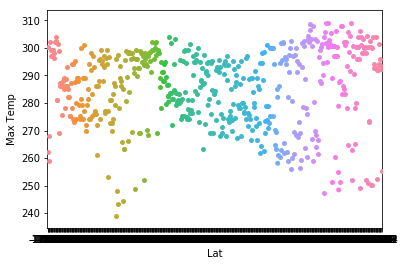

In [35]:
#plt.plot(dataFrameWithData['Lat'], dataFrameWithData["Max Temp"], 'o', color='black');
#plt.xlabel('latitude', fontsize=18)
#plt.ylabel('temperature', fontsize=16)

sns.swarmplot(x='Lat', y='Max Temp', data=dataFrameWithData[['Max Temp','Lat']])



#### Latitude vs. Humidity Plot

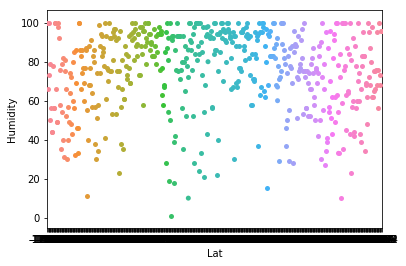

In [36]:
sns.swarmplot(x='Lat', y='Humidity', data=dataFrameWithData[['Humidity','Lat']])


#### Latitude vs. Cloudiness Plot

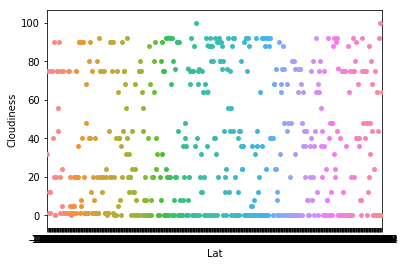

In [37]:
sns.swarmplot(x='Lat', y='Cloudiness', data=dataFrameWithData[['Cloudiness','Lat']])


#### Latitude vs. Wind Speed Plot

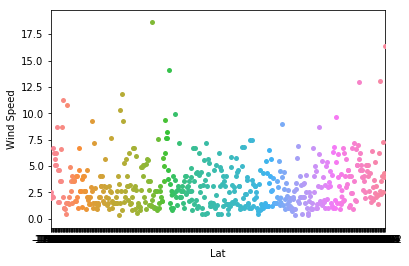

In [38]:
sns.swarmplot(x='Lat', y='Wind Speed', data=dataFrameWithData[['Wind Speed','Lat']])
